# Comparing Results and Metrics

Now that we have completed building the models, prdeiciting and forecasting them.

We go ahead and check how well each model has performed and other such metrics.

### Import Dependencies

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from tabulate import tabulate

### Import  Data

In [2]:
data = pd.read_pickle('Timeseries_data.pkl')
data.sample(3)

,Date,Weighted_price
2284,2021-07-12,370.189257
1099,2016-09-22,276.025118
1724,2019-04-04,365.377553


In [3]:
proph_data = pd.read_csv('FBProphet_predictions_forecast.csv')
proph_data.sample(3)

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
980,980,2016-03-30,231.398886,198.924233,251.840120,231.398886,231.398886,-6.277473,-6.277473,-6.277473,...,-1.516241,-1.516241,-1.516241,-5.985729,-5.985729,-5.985729,0.0,0.0,0.0,225.121413
1723,1723,2019-04-03,358.361024,326.600106,376.899579,358.361024,358.361024,-5.341111,-5.341111,-5.341111,...,-1.516241,-1.516241,-1.516241,-5.049367,-5.049367,-5.049367,0.0,0.0,0.0,353.019913
2152,2152,2020-12-29,331.354105,304.891169,353.978293,331.354105,331.354105,-1.984000,-1.984000,-1.984000,...,-1.299414,-1.299414,-1.299414,-1.909083,-1.909083,-1.909083,0.0,0.0,0.0,329.370105


In [4]:
arima_forecast = pd.read_csv('Forecast_ARIMA.csv')
arima_forecast.sample(3)

,Date,lower,upper,pred
24,2022-04-25,334.455770,382.644677,358.550224
0,2022-04-01,353.753659,363.101857,358.427758
1,2022-04-02,352.123832,365.658872,358.891352


In [5]:
arima_pred = pd.read_csv('Predicted_ARIMA.csv')
arima_pred.sample(3)

,Date,pred,lower,upper
618,2022-01-21,444.352642,299.108447,589.596837
633,2022-02-14,447.427053,299.946717,594.907390
52,2018-10-01,364.173358,328.049234,400.297481


In [6]:
lstm_pred = pd.read_csv('lstm_predicted_test.csv')

In [55]:
lstm_forecast = pd.read_csv('lstm_forecast.csv')

In [43]:
df = data.copy()

In [44]:
df.rename(columns = {'Weighted_price':'Actual'}, inplace = True)

In [10]:
print('Number of test samples in Arima is', arima_pred.shape[0])
print('Number of test samples in LSTM is', lstm_pred.shape[0])

Number of test samples in Arima is 664
Number of test samples in LSTM is 708


### ARIMA

Here we can observe that the Predictions and Actuals are close with an RMSE of Rs. 36. We can also observe that the actual values are well within the 95% CI values

In [11]:
arima_pred.rename(columns = {'pred':'ARIMA','lower':'ARIMA_lower','upper':'ARIMA_upper'}, inplace = True)

In [12]:
arima_pred['Date'] = pd.to_datetime(arima_pred['Date'])

In [13]:
arima_pred = pd.merge(arima_pred,df,on='Date',how='left')

<AxesSubplot:xlabel='Date'>

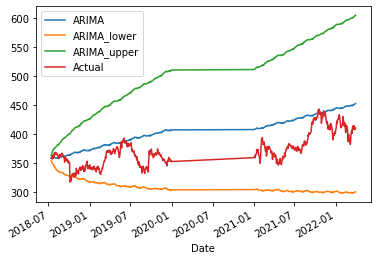

In [14]:
arima_pred.set_index('Date').plot()

### LSTM

LSTM predictions are almost in line with our actual figures which shows us a very good accuracy but also caution should be practiced as this data could have overfit our model. The RMSE is only Rs.4

In [15]:
lstm_pred = lstm_pred.drop(lstm_pred.columns[0],axis=1)

In [16]:
lstm_pred['Test Values']=lstm_pred['Test Values'].str.strip('[]').astype('float')

In [17]:
lstm_pred['Date'] = data.filter(items = range((data.shape[0]-lstm_pred.shape[0]-1),data.shape[0]-1),axis=0).reset_index()['Date']

In [18]:
lstm_pred['Actual'] = data.filter(items = range((data.shape[0]-lstm_pred.shape[0]-1),data.shape[0]-1),axis=0).reset_index()['Weighted_price']

<AxesSubplot:xlabel='Date'>

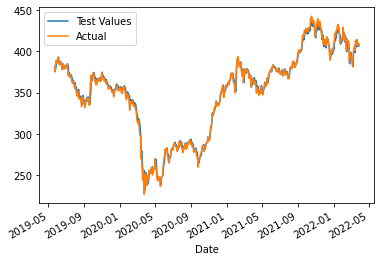

In [19]:
lstm_pred.set_index('Date').plot()

### Prophet

Overall, Prophet model has been satisfactory because although it has more RMSE than LSTM. It considers seasonality effects in multiple facets i.e. Yearly, Monthly, Weekly. This is good as we know that stock prices will never give us a random walk or stationary time series.

In [20]:
proph_data.rename(columns = {'ds':'Date'}, inplace = True)
proph_data = proph_data.drop(proph_data.columns[0],axis=1)
proph_data['Date'] = pd.to_datetime(proph_data['Date'])

In [21]:
proph_test_data = data.copy()

In [22]:
proph_test_data.rename(columns = {'Weighted_price':'Actual'}, inplace = True)

In [23]:
proph_data.columns

Index(['Date', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'daily', 'daily_lower', 'daily_upper', 'weekly',
       'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [24]:
proph_test_data = pd.merge(proph_test_data,proph_data[['Date','yhat_lower','yhat_upper','yhat']],
                           on='Date',how='left')

<AxesSubplot:xlabel='Date'>

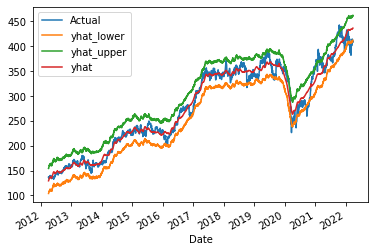

In [25]:
proph_test_data.set_index('Date').plot()

### Comparison

In [26]:
arima_test_mse = sqrt(mse(arima_pred['Actual'],arima_pred['ARIMA']))
lstm_test_mse = sqrt(mse(lstm_pred['Actual'],lstm_pred['Test Values']))
proph_test_mse = sqrt(mse(proph_test_data['Actual'],proph_test_data['yhat']))

In [27]:
table = [['Method','RMSE'],['ARIMA',arima_test_mse],['LSTM',lstm_test_mse],['FB Prophet',proph_test_mse]]
print(tabulate(table,headers='firstrow'))

Method          RMSE
----------  --------
ARIMA       36.883
LSTM         4.78004
FB Prophet  13.0549


In [45]:
temp = pd.DataFrame()
temp['Date'] = pd.date_range(start='31/3/2022', periods=30)
temp['Actual'] = 0

In [46]:
df = df.append(temp,ignore_index=True)

In [47]:
arima_forecast.rename(columns = {'pred':'ARIMA','lower':'ARIMA_lower','upper':'ARIMA_upper'}, inplace = True)
arima_forecast['Date'] = pd.to_datetime(arima_forecast['Date'])
df = pd.merge(df,arima_forecast,on='Date',how='left')

In [57]:
lstm_forecast = lstm_forecast.drop(lstm_forecast.columns[0],axis=1)

In [59]:
lstm_forecast['Prices']=lstm_forecast['Prices'].str.strip('[]').astype('float')

In [61]:
lstm_forecast = lstm_forecast.filter(items=range(2493-30,2493),axis=0)

In [62]:
lstm_forecast.rename(columns={'Prices':'LSTM'},inplace=True)

In [63]:
df = df.join(lstm_forecast)

In [65]:
proph_forecast = proph_data[['yhat_upper','yhat_lower','yhat']]
proph_forecast = proph_forecast.filter(items=range(2493-30,2493),axis=0)

In [66]:
proph_forecast.rename(columns={'yhat':'Prophet','yhat_upper':'Prophet_upper','yhat_lower':'Prophet_lower'},inplace=True)

In [67]:
df = df.join(proph_forecast)

In [68]:
actuals = pd.read_pickle('Actuals_april_22.pkl')

In [69]:
df.Actual.to_numpy()[-30:]= actuals['Weighted_price']

<AxesSubplot:xlabel='Date'>

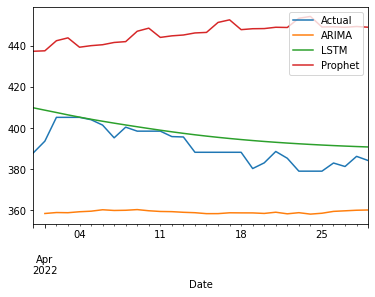

In [71]:
df[['Date','Actual','ARIMA','LSTM','Prophet']].filter(items=range(2493-30,2493),axis=0).set_index('Date').plot()

So here we can see that in the forecasted data that LSTM's have the best predictions. ARIMA and Prophet are similar, however Prophets captures some of the daily ups and downs and doesnt have a smoothened line

<AxesSubplot:xlabel='Date'>

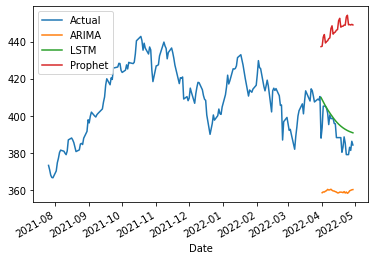

In [72]:
df[['Date','Actual','ARIMA','LSTM','Prophet']].filter(items=range(2493-200,2493),axis=0).set_index('Date').plot()

On check the last 200 days of the price, we can observe that the Entire Range falls within our predictions of Prophet and ARIMA, which is good indicator

Now, we also add rolling mean to the equation as they are popular smoothening techniques.

In [73]:
df['100_rolling'] = df['Actual'].rolling(100).mean()
df['200_rolling'] = df['Actual'].rolling(200).mean()

<AxesSubplot:xlabel='Date'>

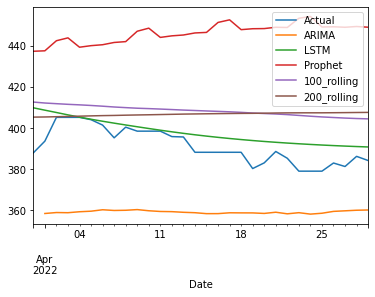

In [76]:
df[['Date','Actual','ARIMA','LSTM','Prophet','100_rolling','200_rolling']].filter(items=range(2493-30,2493),axis=0).set_index('Date').plot()

We still see that LSTM's have emerged victorious thereby concluding that LSTM's are the best univariate predictors in our model.